Hahua Mykyta DA-22 Machine Learning Lab#2

First of all lets download and read data from google drive urls, i uploaded them on google drive

In [ ]:
import os
import gdown
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

train_url = 'https://drive.google.com/uc?id=1UtU7PtyUWRJ5yJJet0gOciwvfk2Dd9IX'

train = 'train.csv'

if not os.path.exists(train):
    print(f"{train} not found. Downloading...")
    gdown.download(train_url, train, quiet=False)
else:
    print(f"{train} already exists. Skipping download.")

df_train = pd.read_csv(train)

lets get info about train table

In [164]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here we see sample of out data

In [165]:
print(df_train.shape)
df_train.head()
df_train.sample(15)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,NaN,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


than we check is there empty values in table

In [167]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

than we check for duplicates 

In [168]:
df_train[df_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


than we delete all columns where missing ratio > 30%

In [169]:
missing_ratio = df_train.isnull().sum() / len(df_train) * 100
print(missing_ratio[missing_ratio > 0].sort_values(ascending=False))

threshold = 0.3
columns_to_drop = missing_ratio[missing_ratio > threshold * 100].index
df_train.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"`Columns deleted: {columns_to_drop}")

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64
`Columns deleted: Index(['Cabin'], dtype='object')


than i fill all the empty values with median

In [170]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

print("Filled missing values in 'Age' with median value")

Filled missing values in 'Age' with median value


here we convert some numerical values into categorical

In [171]:
df_train["Sex"] = df_train["Sex"].map({"female": 0, "male": 1})
mode_value = df_train['Embarked'].mode()[0]
df_train['Embarked'] = df_train['Embarked'].fillna(mode_value)
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_train = df_train.drop(['Ticket', 'Name'], axis=1)

lets see the shape

In [172]:
print(df_train.shape)
df_train.sample(15)

(891, 11)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
355,356,0,3,1,28.0,0,0,9.5000,False,False,True
140,141,0,3,0,28.0,0,2,15.2458,True,False,False
377,378,0,1,1,27.0,0,2,211.5000,True,False,False
22,23,1,3,0,15.0,0,0,8.0292,False,True,False
63,64,0,3,1,4.0,3,2,27.9000,False,False,True
877,878,0,3,1,19.0,0,0,7.8958,False,False,True
421,422,0,3,1,21.0,0,0,7.7333,False,True,False
87,88,0,3,1,28.0,0,0,8.0500,False,False,True
88,89,1,1,0,23.0,3,2,263.0000,False,False,True
101,102,0,3,1,28.0,0,0,7.8958,False,False,True


In [173]:
categorical_columns = ['Pclass', 'Sex', 'Embarked_Q', 'Embarked_S', 'Embarked_C',]
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare',]

functions to display graphics

In [174]:
def plot_numerical_features_histogram(data, numerical_features, bins=30, figsize=(16, 20), color='g', xlabelsize=8,
                                      ylabelsize=8, title="Histograms of Numerical Features"):
    fig = data[numerical_features].hist(
        figsize=figsize,
        color=color,
        bins=bins,
        xlabelsize=xlabelsize,
        ylabelsize=ylabelsize
    )

    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()

    plt.show()


def plot_correlation_heatmap(data, figsize=(16, 12), cmap="Greens", vmax=0.8, annot=True):
    corr_matrix = data.corr()

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    fig, ax = plt.subplots(figsize=figsize)
    fig.set_size_inches(20, 15)
    sns.heatmap(
        corr_matrix,
        mask=mask,
        cmap=cmap,
        vmax=vmax,
        square=True,
        annot=annot,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        ax=ax
    )

    plt.title("Correlation Heatmap", fontsize=18, pad=20)
    plt.tight_layout()
    plt.show()

def plot_boxplots(data, numerical_features, cols=2, figsize=(10, 4)):
    num_features = len(numerical_features)
    rows = math.ceil(num_features / cols)

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(figsize[0] * cols, figsize[1] * rows))
    fig.tight_layout(pad=3.0)

    axes = axes.flatten() if num_features > 1 else [axes]

    for i, col in enumerate(numerical_features):
        sns.boxplot(x=data[col], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot for {col}', fontsize=10)
        axes[i].set_xlabel(col, fontsize=8)
        axes[i].set_ylabel('Value', fontsize=8)

    for j in range(len(numerical_features), len(axes)):
        axes[j].axis('off')

    plt.suptitle("Boxplots of Numerical Features", fontsize=16, y=1.02)
    plt.show()

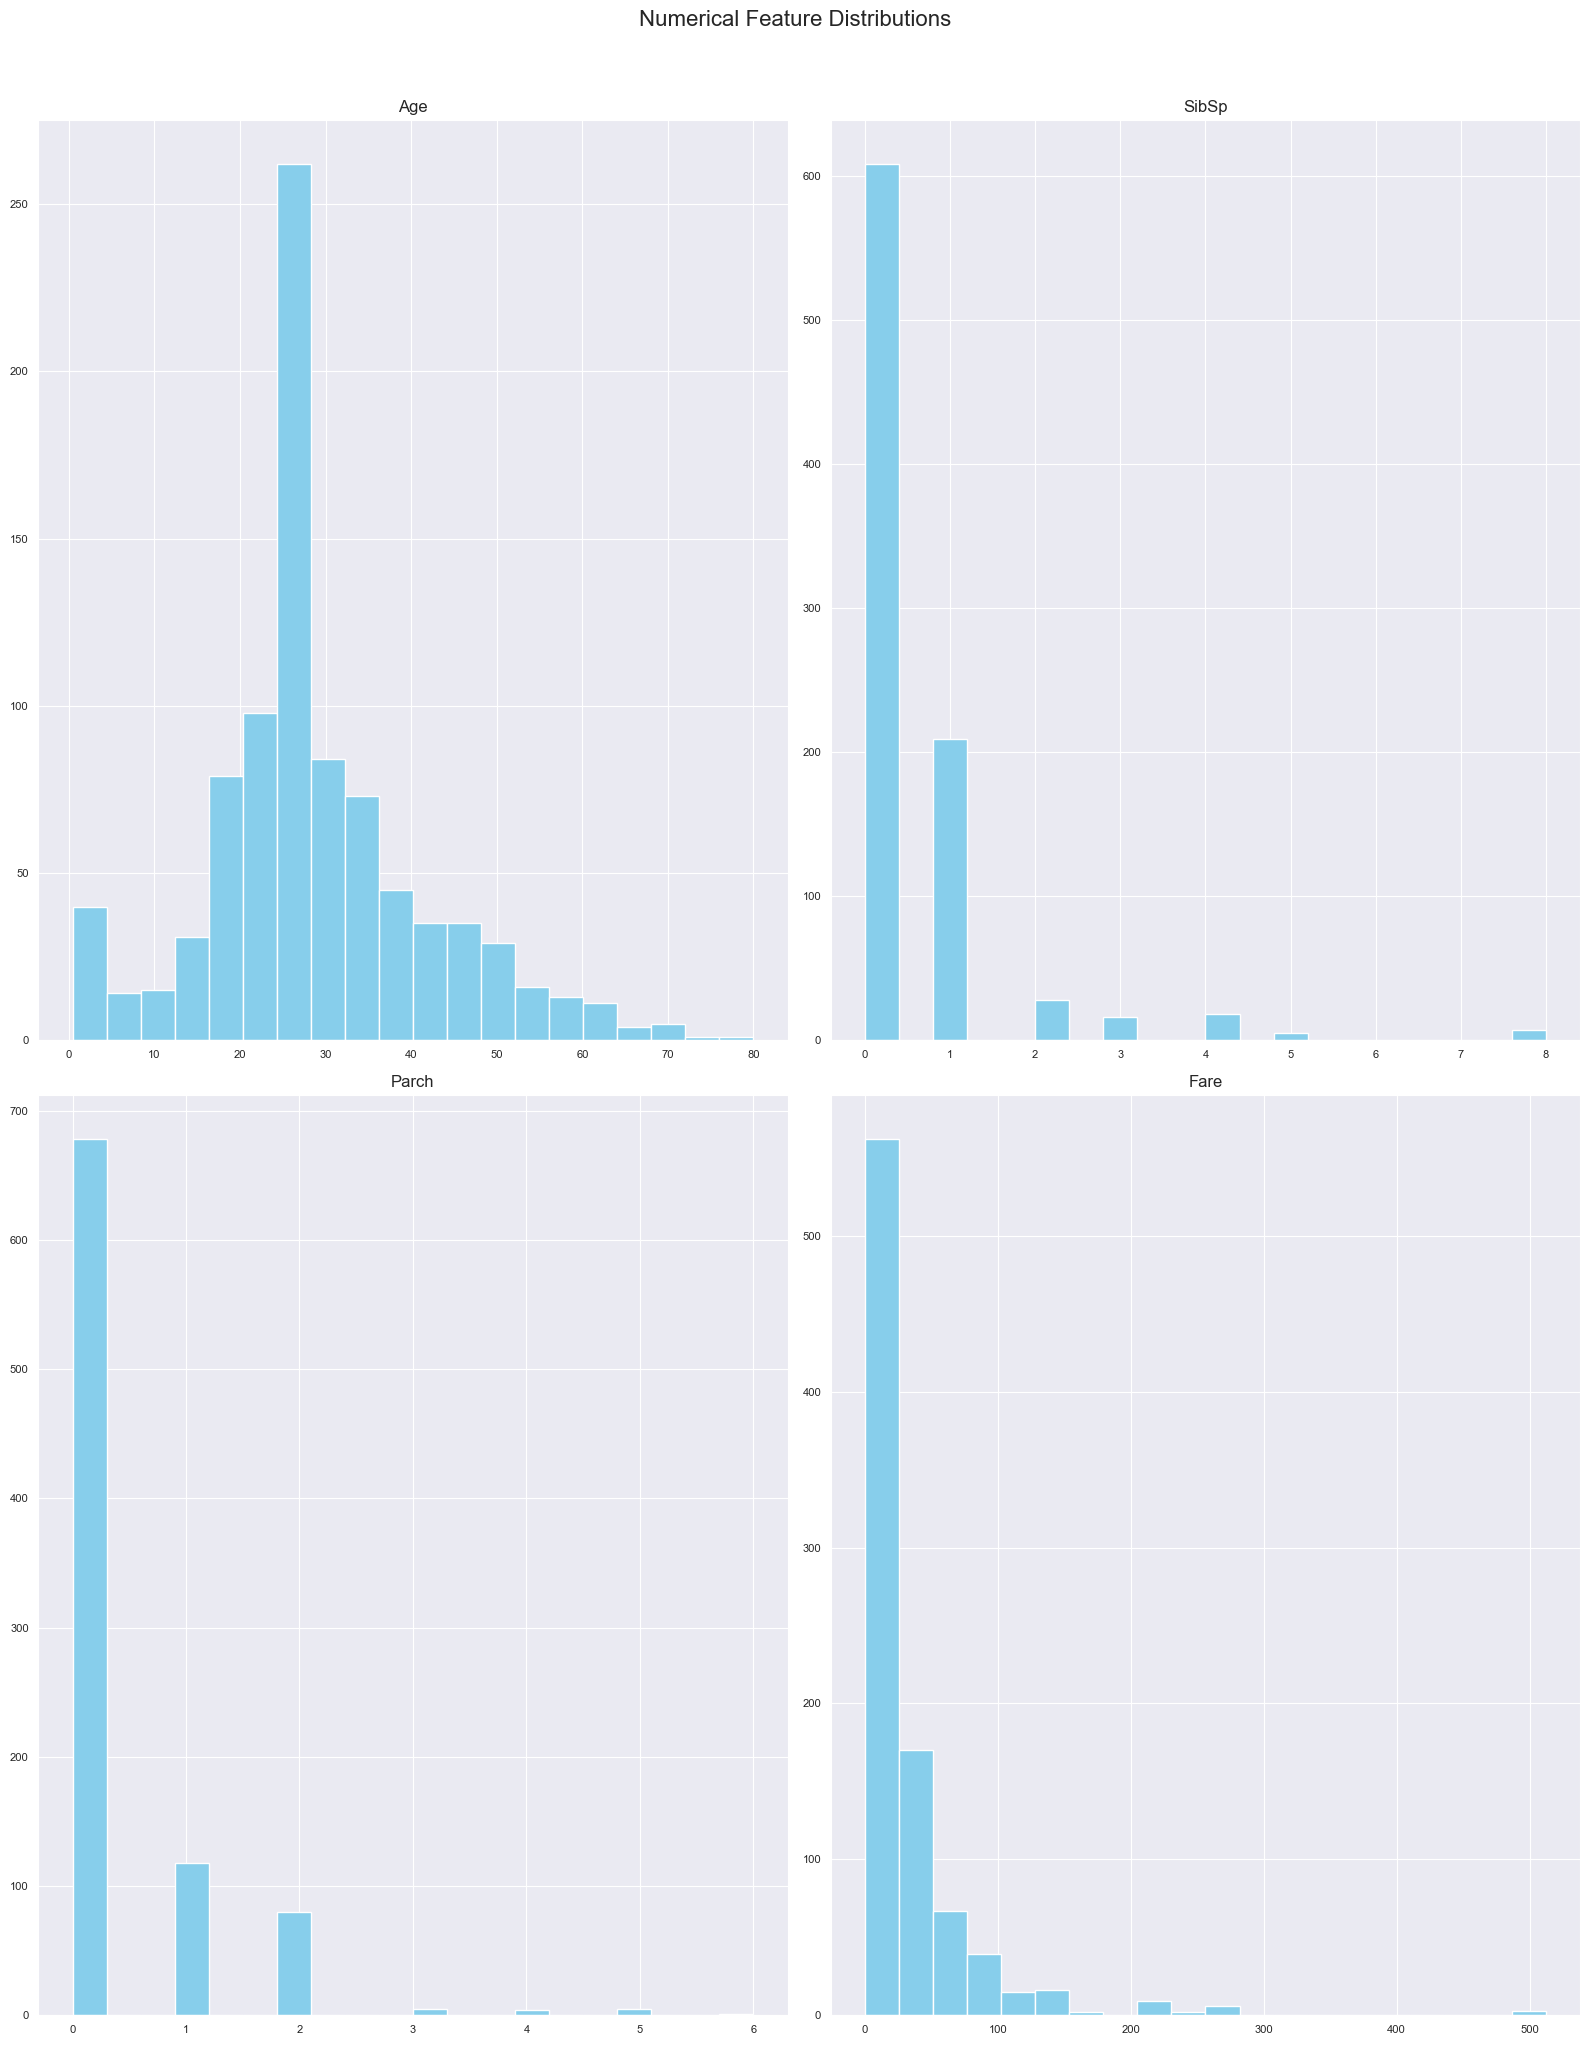

In [175]:
plot_numerical_features_histogram(df_train, numerical_columns, bins=20, color='skyblue',
                                  title="Numerical Feature Distributions")

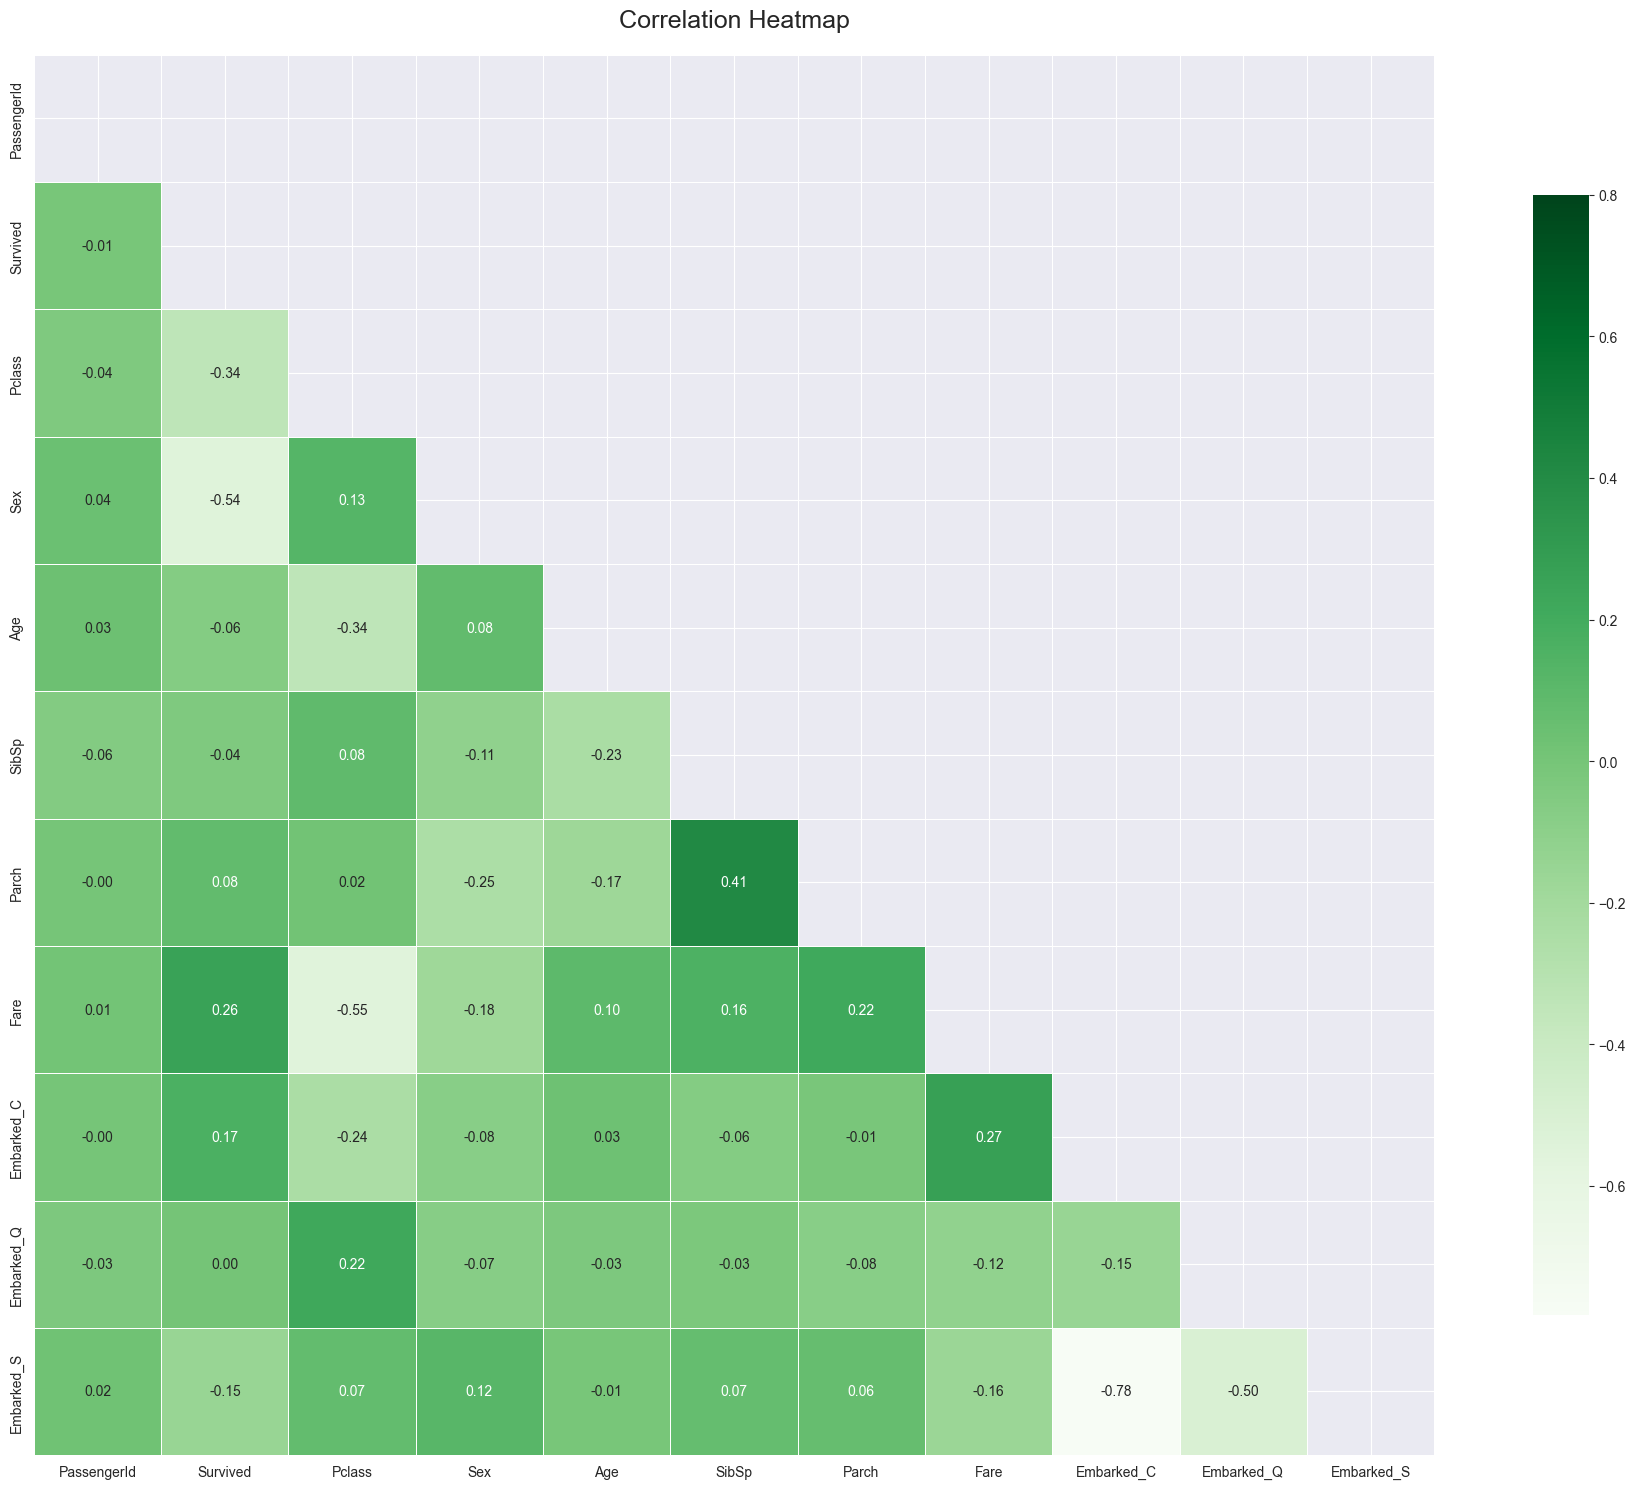

In [176]:
plot_correlation_heatmap(df_train)

here is no big correlation so i wont delete any feature 

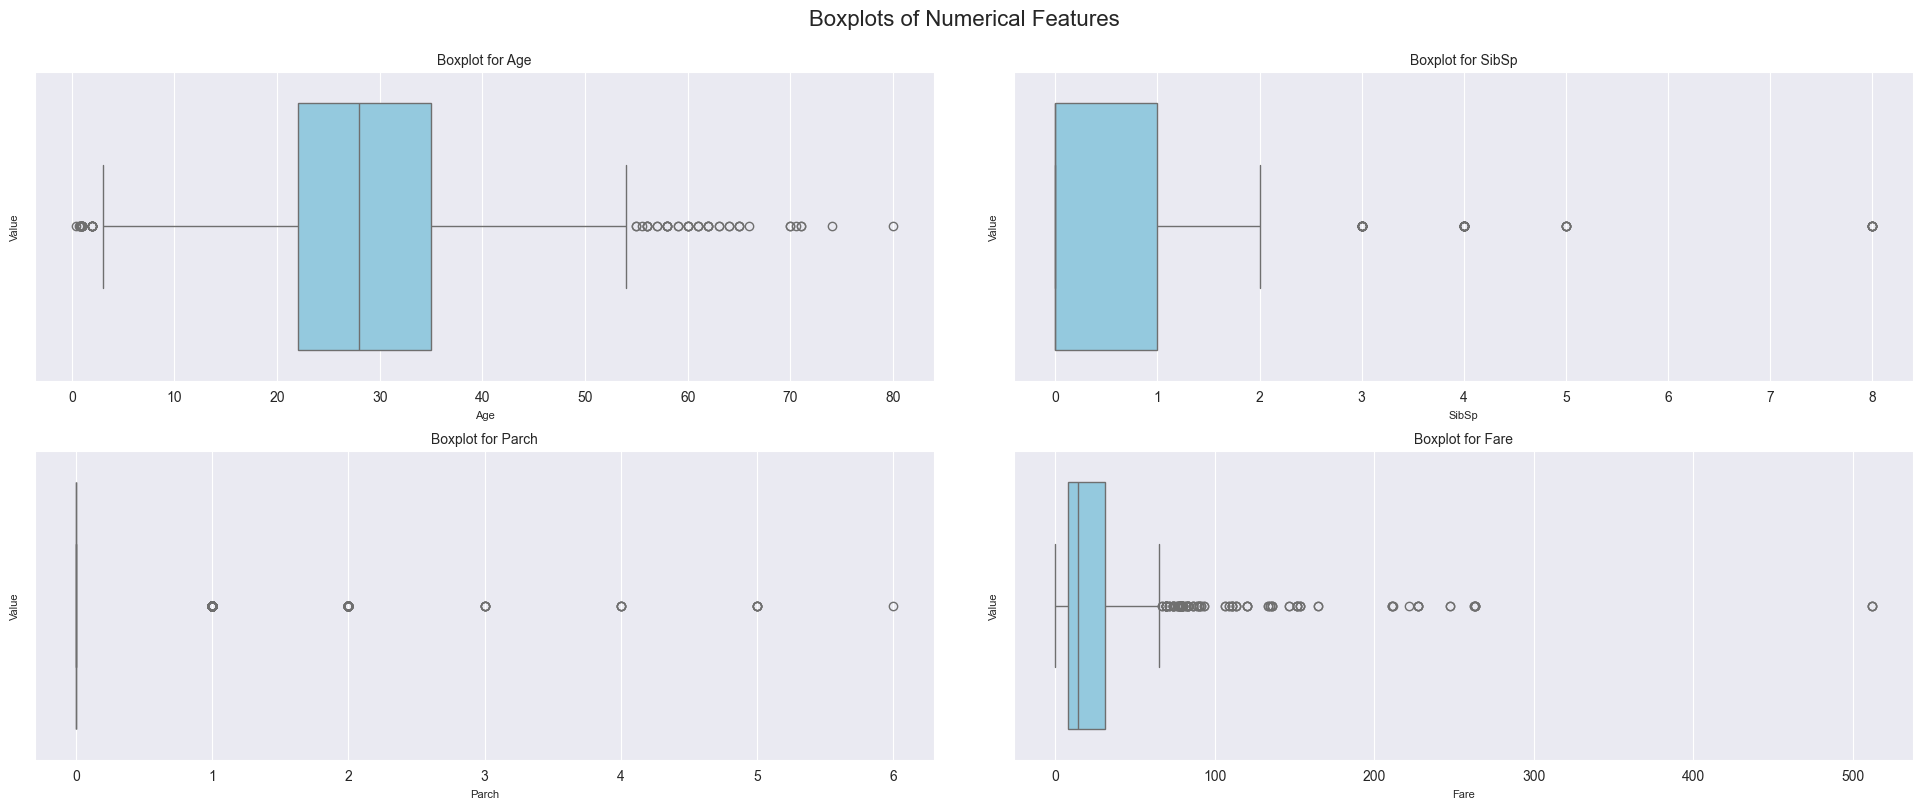

In [177]:
plot_boxplots(df_train, numerical_columns)

function to see pca projection and function to see clustering 

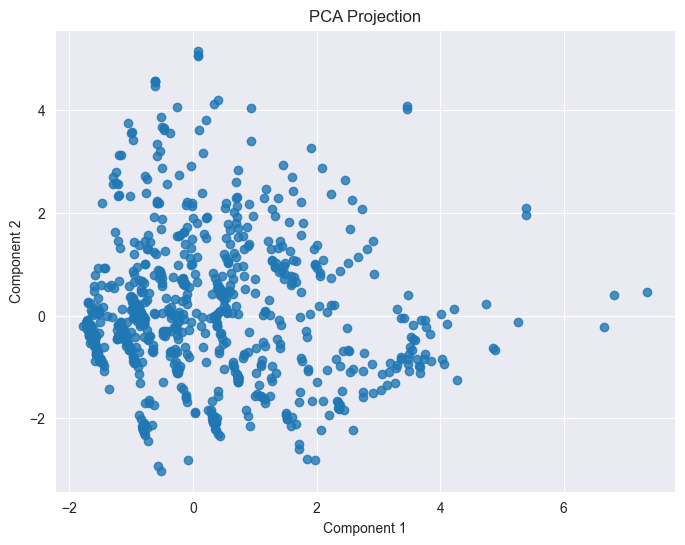

In [178]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

def plot_pca_projection(data_pca, title="PCA Projection"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.8)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()


def visualize_clustering(data, labels, title="Cluster Visualization", centroids=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=50, alpha=0.8)

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

    plt.title(title)
    plt.xlabel("Dim #1")
    plt.ylabel("Dim #2")
    plt.legend()
    plt.show()
    
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_train)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plot_pca_projection(data_pca)

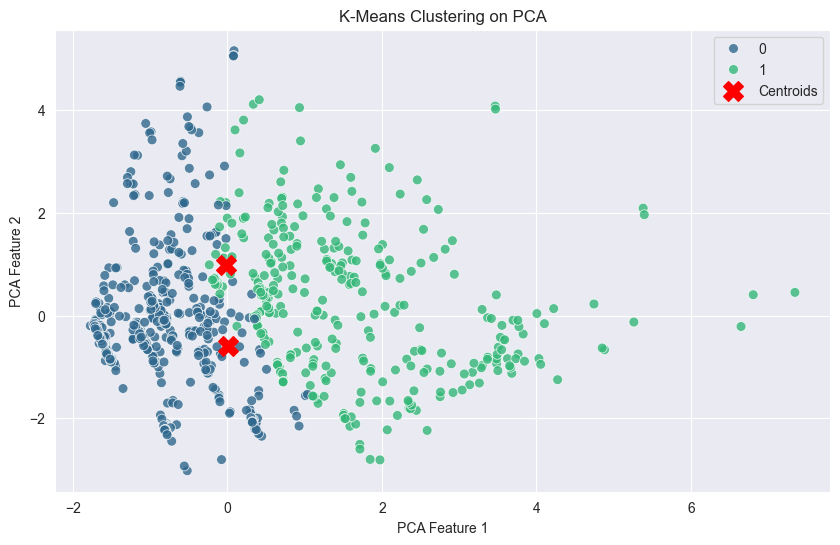

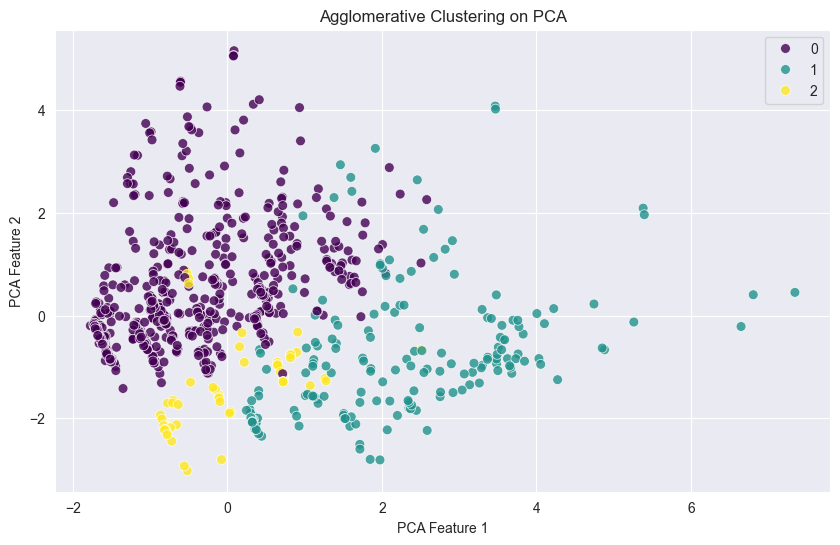

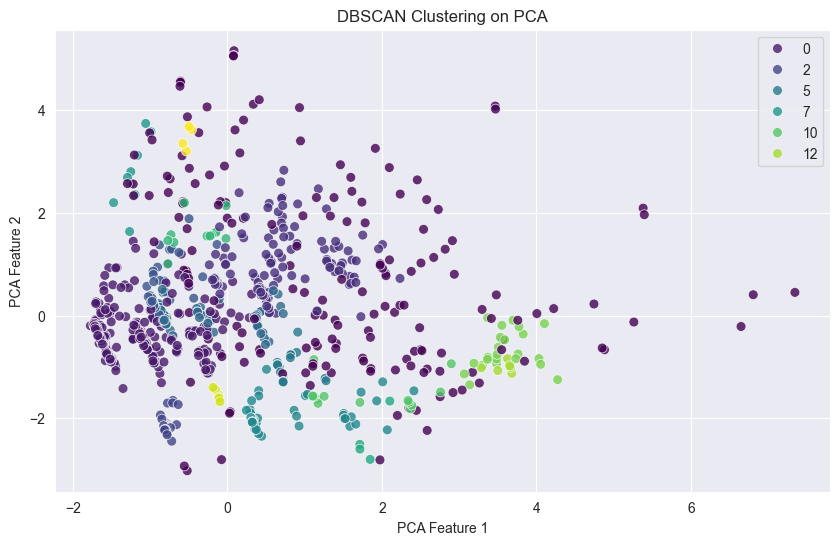

In [182]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_centroids = kmeans.cluster_centers_
visualize_clustering(data_pca, kmeans_labels, "K-Means Clustering", centroids=kmeans_centroids)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)
visualize_clustering(data_pca, agglo_labels, "Agglomerative Clustering")

# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
visualize_clustering(data_pca, dbscan_labels, "DBSCAN Clustering")